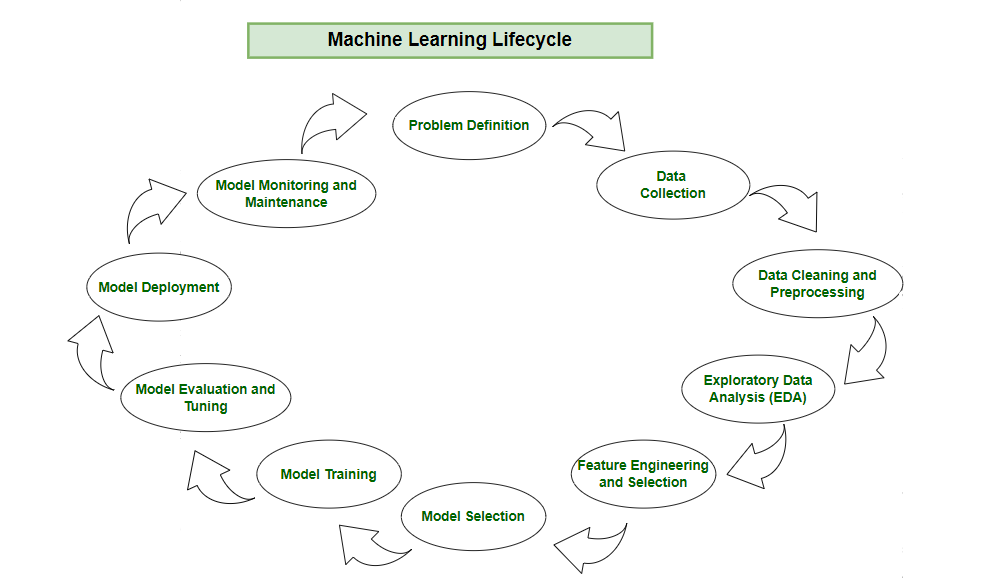

# Data preprocessing

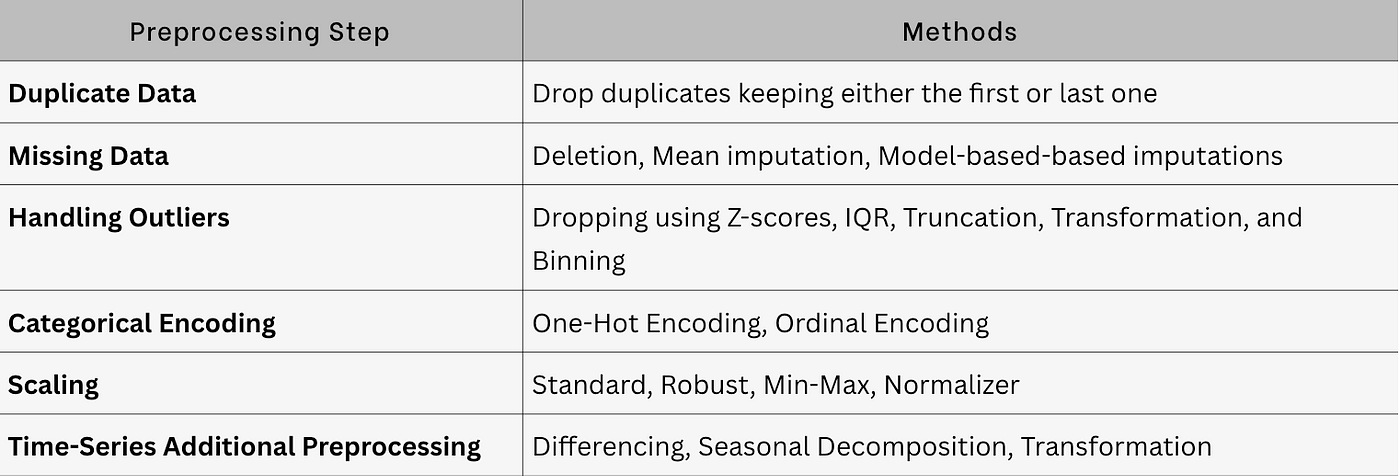

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv(f'./data/loans data.csv')
print(df.shape)
df.head()

(2500, 15)


,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2499 non-null   object 
 2   Amount.Funded.By.Investors      2499 non-null   object 
 3   Interest.Rate                   2500 non-null   object 
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2497 non-null   float64
 10  FICO.Range                      2500 non-null   object 
 11  Open.CREDIT.Lines               2496 non-null   object 
 12  Revolving.CREDIT.Balance        24

## Removing Inconsistencies

In [82]:
# Changing datatypes
df.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [83]:
# Loan Length
df['Loan.Length'].value_counts(dropna = False)

Loan.Length
36 months    1950
60 months     548
.               1
NaN             1
Name: count, dtype: int64

In [84]:
df['Loan.Length'] = df['Loan.Length'].str.replace("months","").str.strip()
df['Loan.Length'].value_counts(dropna = False)

Loan.Length
36     1950
60      548
.         1
NaN       1
Name: count, dtype: int64

In [85]:
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [86]:
df[['Interest.Rate','Debt.To.Income.Ratio']] = df[['Interest.Rate','Debt.To.Income.Ratio']].apply(lambda x: x.str.replace("%", ""))

In [87]:
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [88]:
df[['Fico-low','Fico-high']] = df['FICO.Range'].str.split("-",expand = True)
del df['FICO.Range']
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico-low,Fico-high
0,81174.0,20000,20000,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14,14272,2.0,< 1 year,735,739
1,99592.0,19200,19200,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12,11140,1.0,2 years,715,719
2,80059.0,35000,35000,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,14,21977,1.0,2 years,690,694
3,15825.0,10000,9975,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,10,9346,0.0,5 years,695,699
4,33182.0,12000,12000,11.71,36,credit_card,18.78,NJ,RENT,3195.00,11,14469,0.0,9 years,695,699


In [89]:
df['Employment.Length'].unique()

array(['< 1 year', '2 years', '5 years', '9 years', '3 years',
       '10+ years', '8 years', '6 years', '1 year', '7 years', '.',
       '4 years', nan], dtype=object)

In [90]:
df['Employment.Length'] = df['Employment.Length'].str.replace('years','').\
                                                    str.replace('year','').\
                                                    str.replace('<','').\
                                                    str.replace('+','').str.strip()

In [91]:
df['Employment.Length'].unique()

array(['1', '2', '5', '9', '3', '10', '8', '6', '7', '.', '4', nan],
      dtype=object)

In [92]:
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico-low,Fico-high
0,81174.0,20000,20000,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14,14272,2.0,1,735,739
1,99592.0,19200,19200,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12,11140,1.0,2,715,719
2,80059.0,35000,35000,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,14,21977,1.0,2,690,694
3,15825.0,10000,9975,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,10,9346,0.0,5,695,699
4,33182.0,12000,12000,11.71,36,credit_card,18.78,NJ,RENT,3195.00,11,14469,0.0,9,695,699


In [93]:
numeric_cols = ['Amount.Requested','Amount.Funded.By.Investors', 'Interest.Rate','Debt.To.Income.Ratio','Open.CREDIT.Lines',
                'Revolving.CREDIT.Balance','Inquiries.in.the.Last.6.Months','Fico-low','Fico-high']
df_numerics = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')
df_numerics

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high
0,20000.0,20000.00,8.90,14.90,14.0,14272.0,2.0,735,739
1,19200.0,19200.00,12.12,28.36,12.0,11140.0,1.0,715,719
2,35000.0,35000.00,21.98,23.81,14.0,21977.0,1.0,690,694
3,10000.0,9975.00,9.99,14.30,10.0,9346.0,0.0,695,699
4,12000.0,12000.00,11.71,18.78,11.0,14469.0,0.0,695,699
...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,19.23,15.0,45880.0,1.0,705,709
2496,16000.0,16000.00,14.09,21.54,18.0,18898.0,1.0,740,744
2497,10000.0,10000.00,13.99,4.89,4.0,4544.0,0.0,680,684
2498,6000.0,6000.00,12.42,16.66,8.0,NaN,0.0,675,679


In [94]:
df_numerics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2495 non-null   float64
 1   Amount.Funded.By.Investors      2495 non-null   float64
 2   Interest.Rate                   2500 non-null   float64
 3   Debt.To.Income.Ratio            2499 non-null   float64
 4   Open.CREDIT.Lines               2491 non-null   float64
 5   Revolving.CREDIT.Balance        2495 non-null   float64
 6   Inquiries.in.the.Last.6.Months  2497 non-null   float64
 7   Fico-low                        2500 non-null   int64  
 8   Fico-high                       2500 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 175.9 KB


In [95]:
df.drop(numeric_cols, axis = 1,inplace = True)
df

,ID,Loan.Length,Loan.Purpose,State,Home.Ownership,Monthly.Income,Employment.Length
0,81174.0,36,debt_consolidation,SC,MORTGAGE,6541.67,1
1,99592.0,36,debt_consolidation,TX,MORTGAGE,4583.33,2
2,80059.0,60,debt_consolidation,CA,MORTGAGE,11500.00,2
3,15825.0,36,debt_consolidation,KS,MORTGAGE,3833.33,5
4,33182.0,36,credit_card,NJ,RENT,3195.00,9
...,...,...,...,...,...,...,...
2495,23735.0,60,debt_consolidation,NY,MORTGAGE,9250.00,8
2496,65882.0,60,home_improvement,MD,OWN,8903.25,10
2497,55610.0,36,debt_consolidation,PA,MORTGAGE,2166.67,10
2498,38576.0,36,major_purchase,NJ,RENT,3500.00,5


In [96]:
df = pd.concat([df,df_numerics],axis = 1)
df

,ID,Loan.Length,Loan.Purpose,State,Home.Ownership,Monthly.Income,Employment.Length,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high
0,81174.0,36,debt_consolidation,SC,MORTGAGE,6541.67,1,20000.0,20000.00,8.90,14.90,14.0,14272.0,2.0,735,739
1,99592.0,36,debt_consolidation,TX,MORTGAGE,4583.33,2,19200.0,19200.00,12.12,28.36,12.0,11140.0,1.0,715,719
2,80059.0,60,debt_consolidation,CA,MORTGAGE,11500.00,2,35000.0,35000.00,21.98,23.81,14.0,21977.0,1.0,690,694
3,15825.0,36,debt_consolidation,KS,MORTGAGE,3833.33,5,10000.0,9975.00,9.99,14.30,10.0,9346.0,0.0,695,699
4,33182.0,36,credit_card,NJ,RENT,3195.00,9,12000.0,12000.00,11.71,18.78,11.0,14469.0,0.0,695,699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,60,debt_consolidation,NY,MORTGAGE,9250.00,8,30000.0,29950.00,16.77,19.23,15.0,45880.0,1.0,705,709
2496,65882.0,60,home_improvement,MD,OWN,8903.25,10,16000.0,16000.00,14.09,21.54,18.0,18898.0,1.0,740,744
2497,55610.0,36,debt_consolidation,PA,MORTGAGE,2166.67,10,10000.0,10000.00,13.99,4.89,4.0,4544.0,0.0,680,684
2498,38576.0,36,major_purchase,NJ,RENT,3500.00,5,6000.0,6000.00,12.42,16.66,8.0,NaN,0.0,675,679


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Loan.Length                     2499 non-null   object 
 2   Loan.Purpose                    2499 non-null   object 
 3   State                           2499 non-null   object 
 4   Home.Ownership                  2499 non-null   object 
 5   Monthly.Income                  2497 non-null   float64
 6   Employment.Length               2422 non-null   object 
 7   Amount.Requested                2495 non-null   float64
 8   Amount.Funded.By.Investors      2495 non-null   float64
 9   Interest.Rate                   2500 non-null   float64
 10  Debt.To.Income.Ratio            2499 non-null   float64
 11  Open.CREDIT.Lines               2491 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [98]:
[(col,val) for col,val in df.apply(lambda x : x == ".").sum().items() if val > 0]

[('Loan.Length', 1), ('State', 1), ('Employment.Length', 2)]

In [99]:
# Some data has .

col_with_dots = [(col,val) for col,val in df.apply(lambda x : x == ".").sum().items() if val > 0]
col_with_dots

[('Loan.Length', 1), ('State', 1), ('Employment.Length', 2)]

In [100]:
df.shape

(2500, 16)

In [101]:
# dropping the records with "."
for col in col_with_dots:
    df = df[df[col[0]] != "."]
df.shape

(2496, 16)

## Handling Duplicated data

In [102]:
df.duplicated().sum()

1

In [103]:
df[df.duplicated()]

,ID,Loan.Length,Loan.Purpose,State,Home.Ownership,Monthly.Income,Employment.Length,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high
2231,98259.0,36,credit_card,UT,MORTGAGE,6750.0,5,20000.0,19975.0,12.12,19.82,14.0,21637.0,0.0,685,689


In [104]:
df[df['ID'] == 98259]

,ID,Loan.Length,Loan.Purpose,State,Home.Ownership,Monthly.Income,Employment.Length,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high
2161,98259.0,36,credit_card,UT,MORTGAGE,6750.0,5,20000.0,19975.0,12.12,19.82,14.0,21637.0,0.0,685,689
2231,98259.0,36,credit_card,UT,MORTGAGE,6750.0,5,20000.0,19975.0,12.12,19.82,14.0,21637.0,0.0,685,689


In [105]:
df = df.drop_duplicates()
df.shape

(2495, 16)

## Handling Missing Data

In [106]:
df.isnull().sum().sum()

113

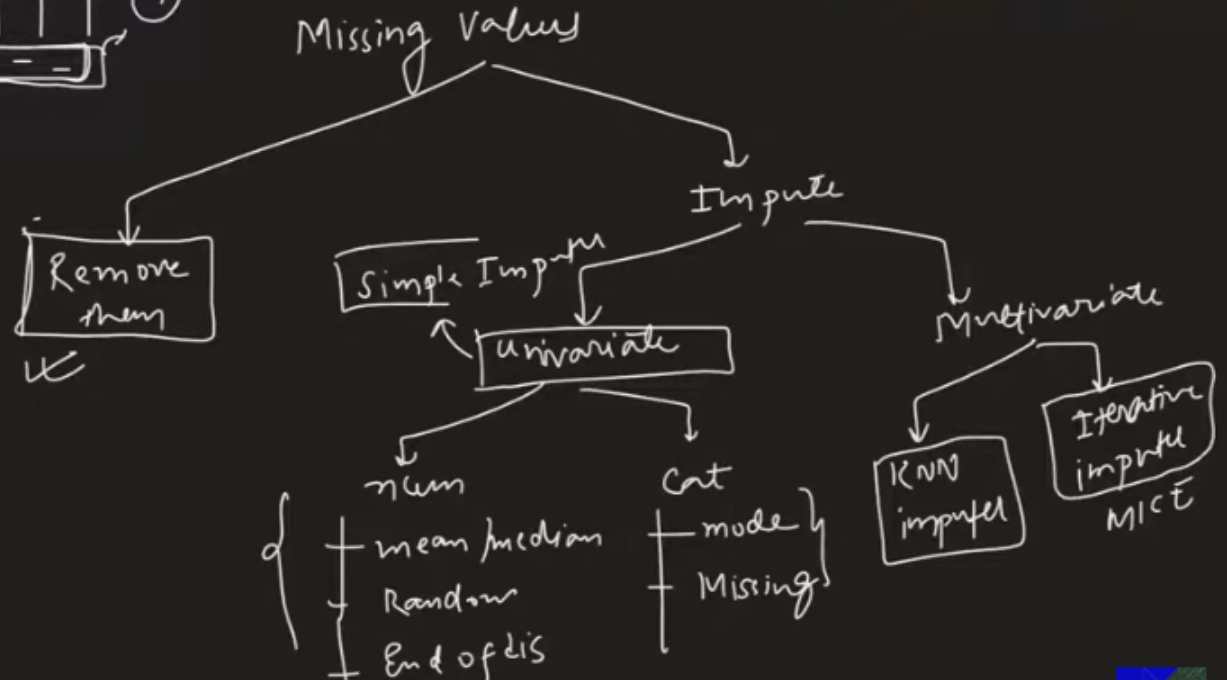

### 1. Remove missing data

Rules for removing:
1. Missing data should be less than 5 %
2. MCAR (Missing completely at random)

In [107]:
# Rule 1 Check
(df.isna().mean() * 100).sort_values(ascending = False)

Employment.Length                 3.086172
Open.CREDIT.Lines                 0.360721
Amount.Requested                  0.200401
Amount.Funded.By.Investors        0.200401
Revolving.CREDIT.Balance          0.200401
Monthly.Income                    0.120240
Inquiries.in.the.Last.6.Months    0.120240
ID                                0.040080
Loan.Length                       0.040080
Loan.Purpose                      0.040080
State                             0.040080
Home.Ownership                    0.040080
Debt.To.Income.Ratio              0.040080
Interest.Rate                     0.000000
Fico-low                          0.000000
Fico-high                         0.000000
dtype: float64

In [108]:
cols_to_drop = [var for var in df.columns if (df[var].isnull().mean()*100 < 5) & (df[var].isnull().mean()*100 > 0)]
num_cols = [col for col in cols_to_drop if df[col].dtypes != 'object']
cat_cols = [col for col in cols_to_drop if df[col].dtypes == 'object']

new_df = df.dropna(subset = cols_to_drop)
df.shape, new_df.shape

((2495, 16), (2390, 16))

ID 1


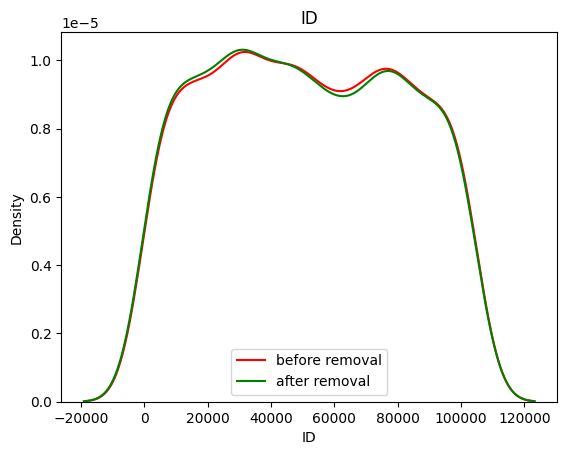

Monthly.Income 3


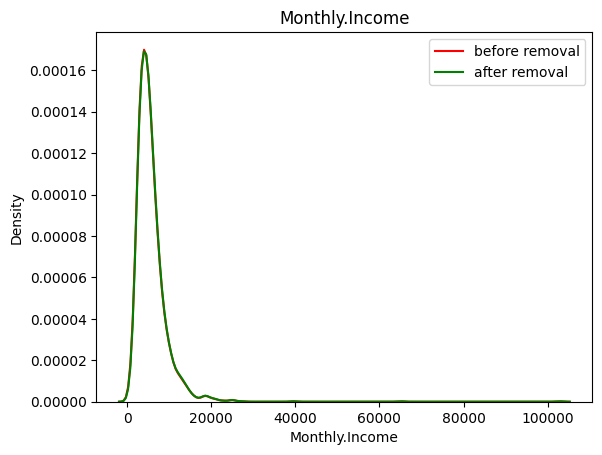

Amount.Requested 5


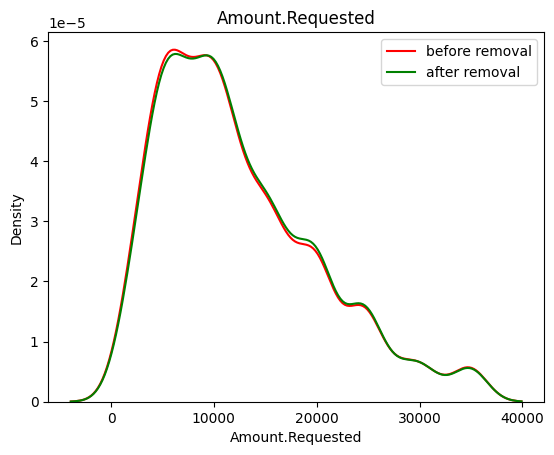

Amount.Funded.By.Investors 5


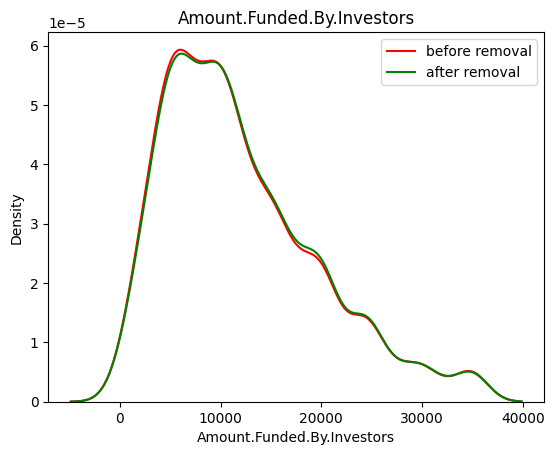

Debt.To.Income.Ratio 1


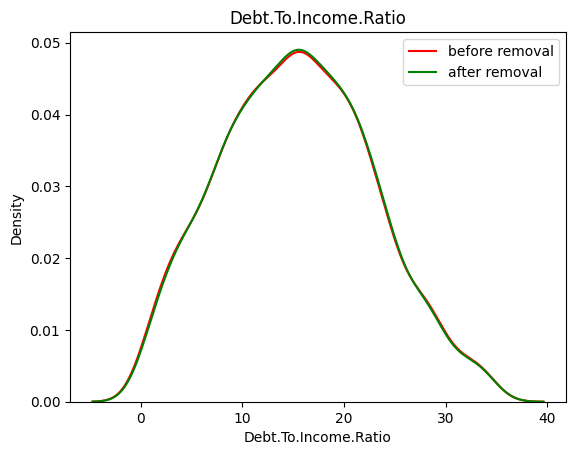

Open.CREDIT.Lines 9


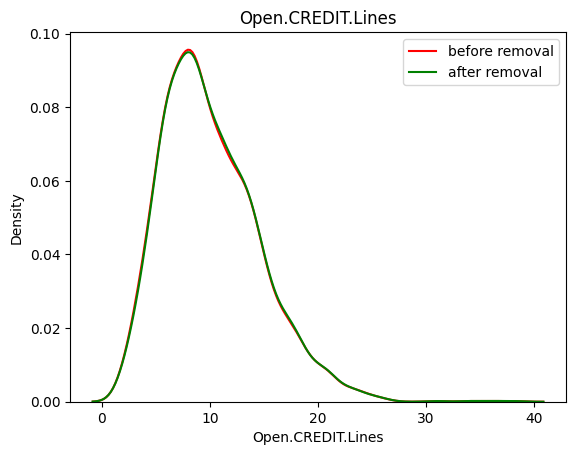

Revolving.CREDIT.Balance 5


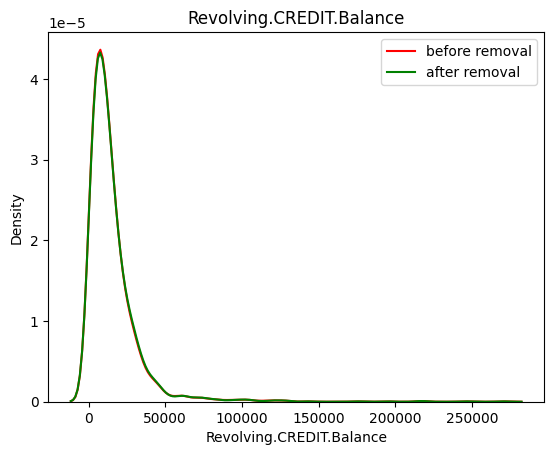

Inquiries.in.the.Last.6.Months 3


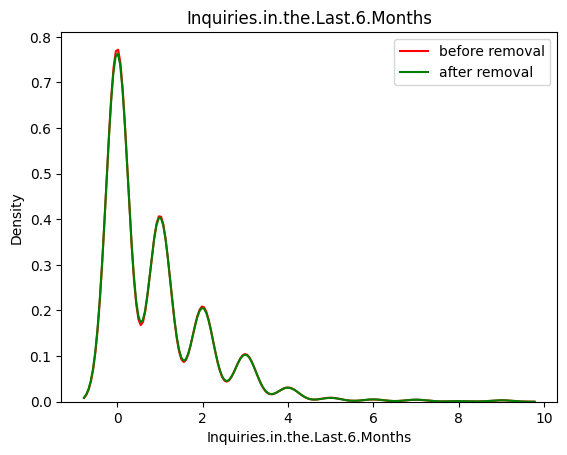

In [109]:
# Rule 2: Check for MCAR (for numerical cols)

fig = plt.figure()
for col in num_cols:

    print(col, df[col].isna().sum())
    # original data
    sns.kdeplot(df[col], color='red',label = 'before removal')
    
    # data after cca
    sns.kdeplot(new_df[col], color='green', label = 'after removal')
    plt.title(col)
    plt.legend()
    plt.show()

Column: Loan.Length
Missing values: 1


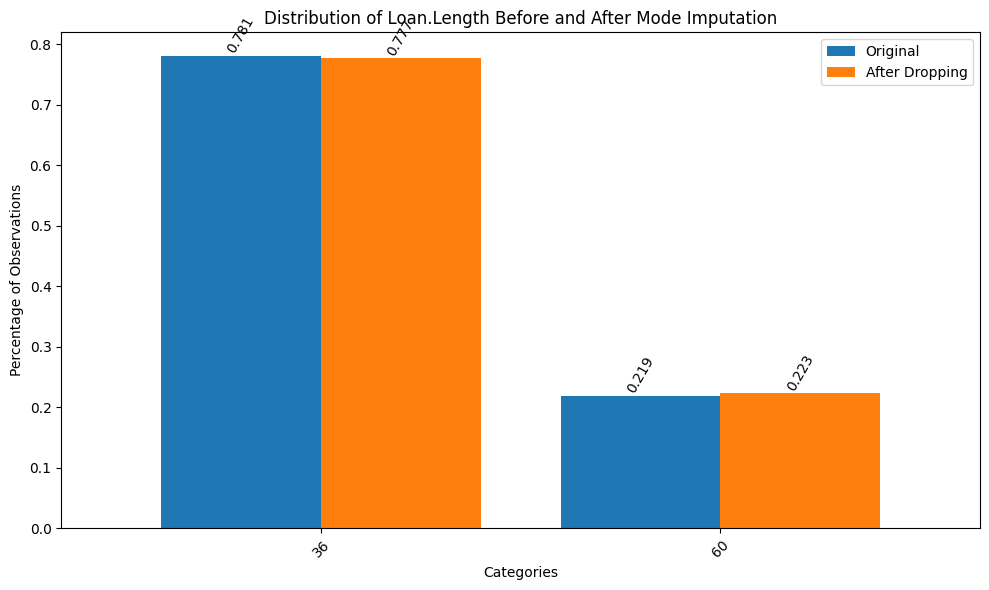

--------------------------------------------------
Column: Loan.Purpose
Missing values: 1


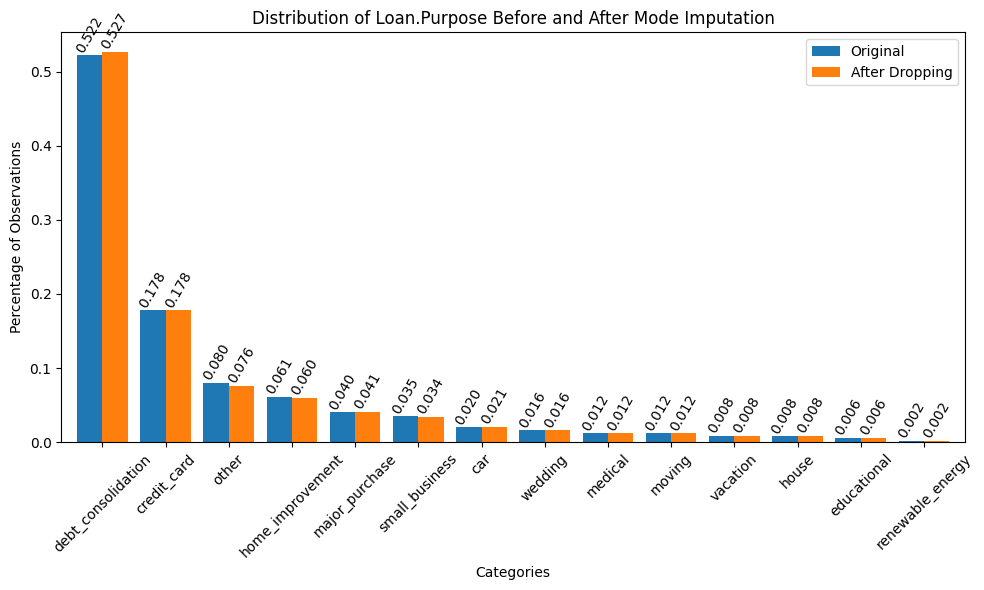

--------------------------------------------------
Column: State
Missing values: 1


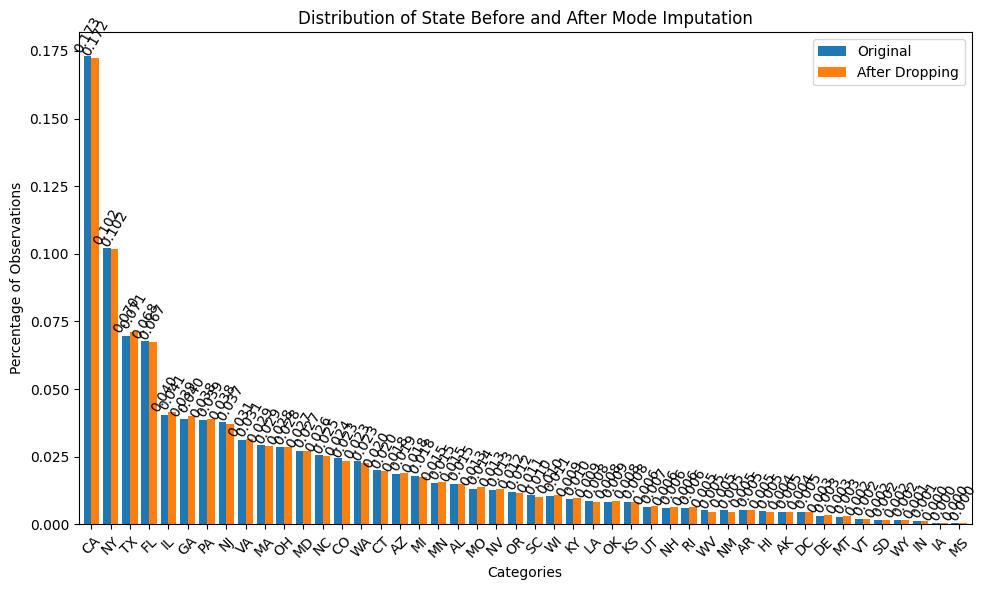

--------------------------------------------------
Column: Home.Ownership
Missing values: 1


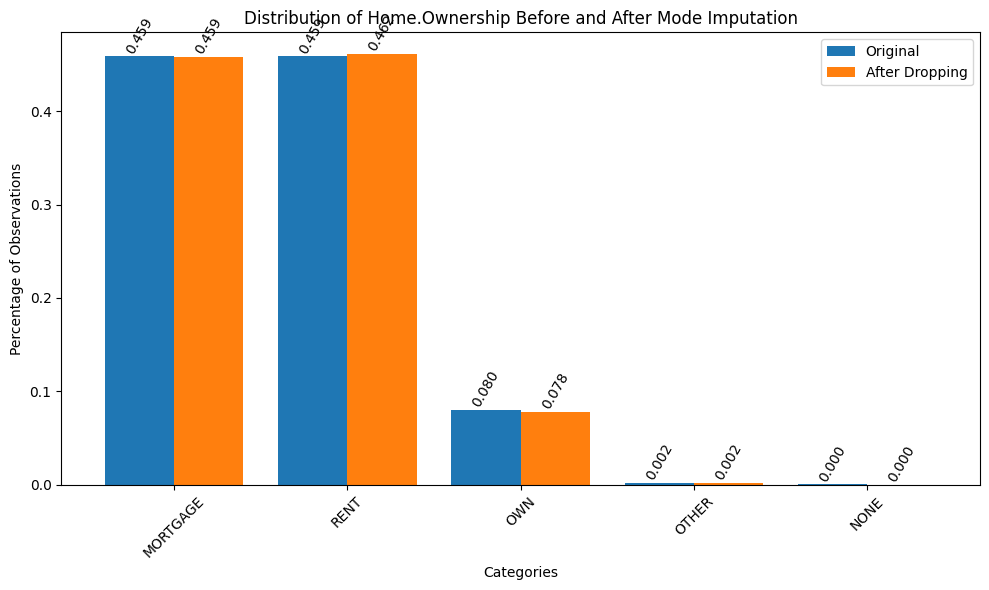

--------------------------------------------------
Column: Employment.Length
Missing values: 77


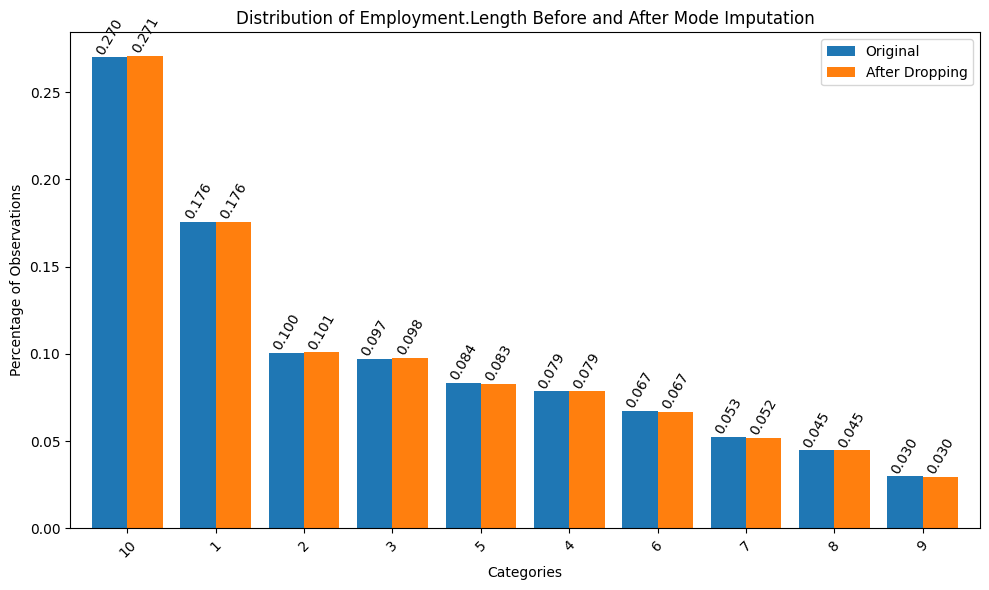

--------------------------------------------------


In [110]:
# Rule 2: Check for MCAR (for categorical columns)
for col in cat_cols:
    # Display the number of missing values in the current column
    missing_count = df[col].isna().sum()
    print(f"Column: {col}")
    print(f"Missing values: {missing_count}")
    
    # Calculate the percentage of observations per category for original and imputed data
    temp = pd.concat([
        df[col].value_counts(normalize=True),               # original data (with missing values)
        new_df[col].value_counts(normalize=True)       # data after imputing with mode
    ], axis=1)
    
    # Add column names
    temp.columns = ['Original', 'After Dropping']
    
    # Plot the comparison
    ax = temp.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title(f'Distribution of {col} Before and After Mode Imputation')
    plt.xlabel('Categories')
    plt.ylabel('Percentage of Observations')
    plt.xticks(rotation=45)
    
    # Annotate the bars with the percentage values (rotate text vertically)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.3f}',  # text annotation with 2 decimal places
                    (p.get_x() + p.get_width() / 2., height),  # position
                    ha='center', va='bottom', fontsize=10, color='black', rotation=60)  # vertical rotation
    
    plt.legend(loc='upper right')
    plt.tight_layout()  # Adjust layout to avoid label overlap
    plt.show()
    
    print("-" * 50)


- **Advantage:** Easy to implement

- **Disadvantage:** You will drop the missing values -> Train the model -> But when you put that into production and missing values comes there then the model does not know how to handle it
 

### 2. Impute missing data (mean,median,mode)

Rules for imputing:
1. Missing data should be less than 5 %
2. MCAR (Missing completely at random)

In [111]:
# Rule 1 Check
(df.isna().mean() * 100).sort_values(ascending = False)

Employment.Length                 3.086172
Open.CREDIT.Lines                 0.360721
Amount.Requested                  0.200401
Amount.Funded.By.Investors        0.200401
Revolving.CREDIT.Balance          0.200401
Monthly.Income                    0.120240
Inquiries.in.the.Last.6.Months    0.120240
ID                                0.040080
Loan.Length                       0.040080
Loan.Purpose                      0.040080
State                             0.040080
Home.Ownership                    0.040080
Debt.To.Income.Ratio              0.040080
Interest.Rate                     0.000000
Fico-low                          0.000000
Fico-high                         0.000000
dtype: float64

In [112]:
df[cat_cols].mode().iloc[0,:]

Loan.Length                          36
Loan.Purpose         debt_consolidation
State                                CA
Home.Ownership                 MORTGAGE
Employment.Length                    10
Name: 0, dtype: object

In [113]:
cols_to_impute = [var for var in df.columns if (df[var].isnull().mean()*100 < 5) & (df[var].isnull().mean()*100 > 0)]
num_cols = [col for col in cols_to_impute if df[col].dtypes != 'object']
cat_cols = [col for col in cols_to_impute if df[col].dtypes == 'object']

new_df_mean = df.fillna(df[num_cols].mean())
new_df_median = df.fillna(df[num_cols].median())
new_df_mode = df.fillna(df[cat_cols].mode().iloc[0,:])

ID float64


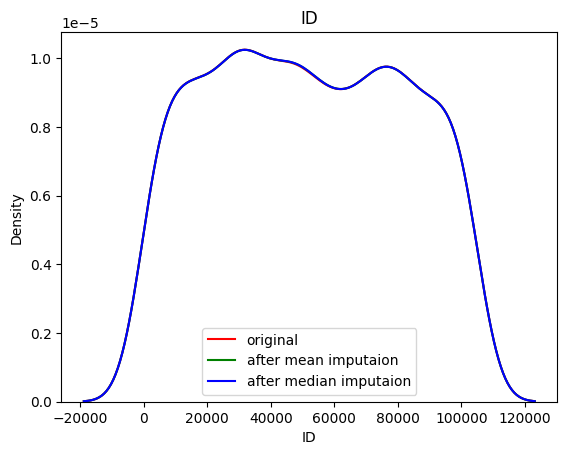

Monthly.Income float64


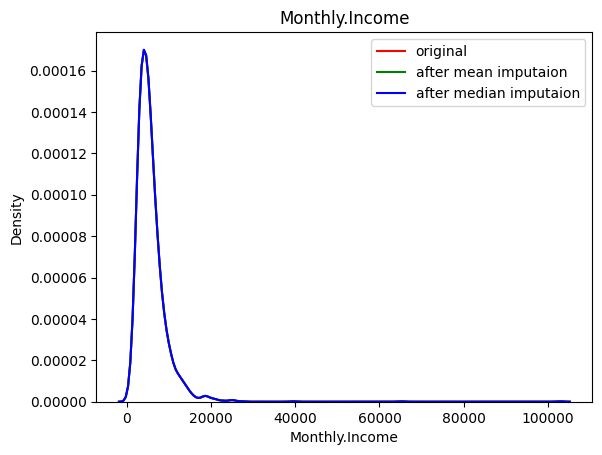

Amount.Requested float64


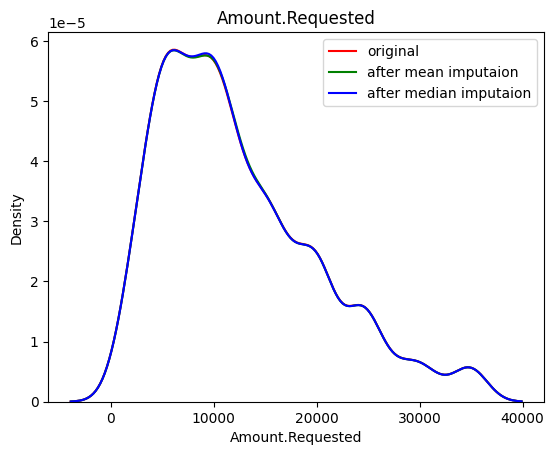

Amount.Funded.By.Investors float64


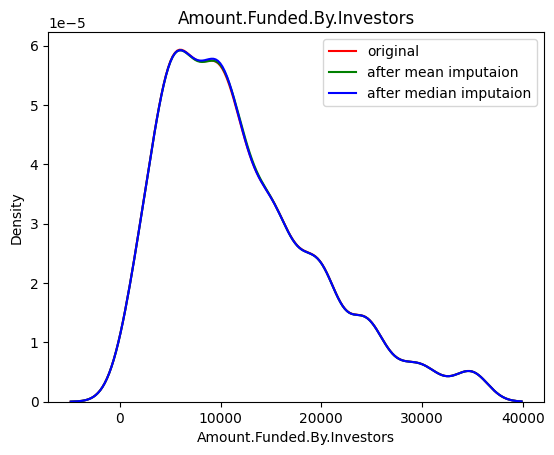

Debt.To.Income.Ratio float64


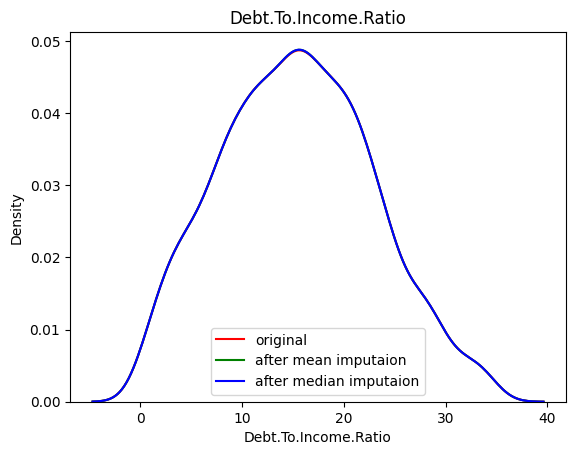

Open.CREDIT.Lines float64


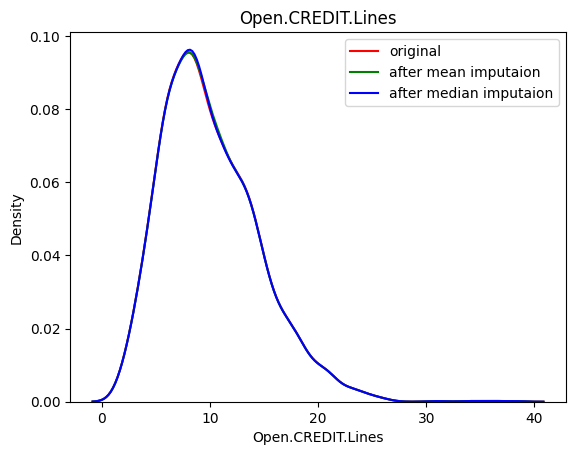

Revolving.CREDIT.Balance float64


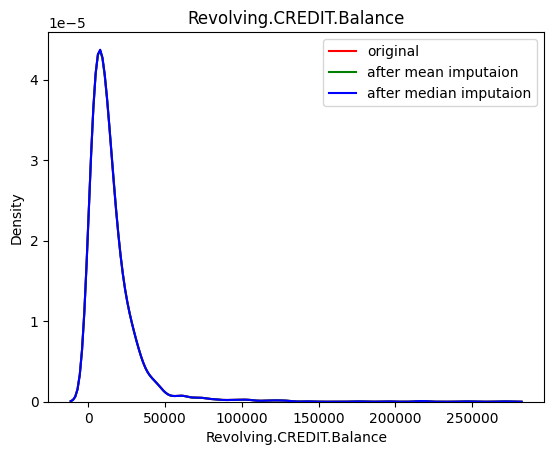

Inquiries.in.the.Last.6.Months float64


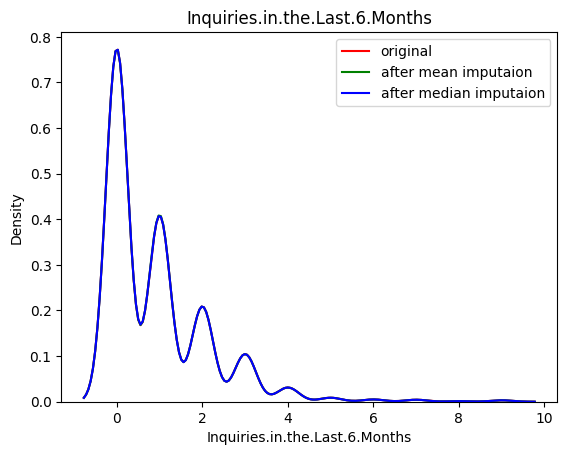

In [114]:
# Rule 2: Check for MCAR (for numerical cols)

fig = plt.figure()
for col in num_cols:
    print(col, df[col].dtype)
    # original data
    sns.kdeplot(df[col],color='red',label = 'original')
    
    # data after mean imputation
    sns.kdeplot(new_df_mean[col], color='green', label = 'after mean imputaion')

    # data after median imputation
    sns.kdeplot(new_df_median[col], color='blue', label = 'after median imputaion')
    plt.title(col)
    plt.legend()
    plt.show()

Column: Loan.Length
Missing values: 1


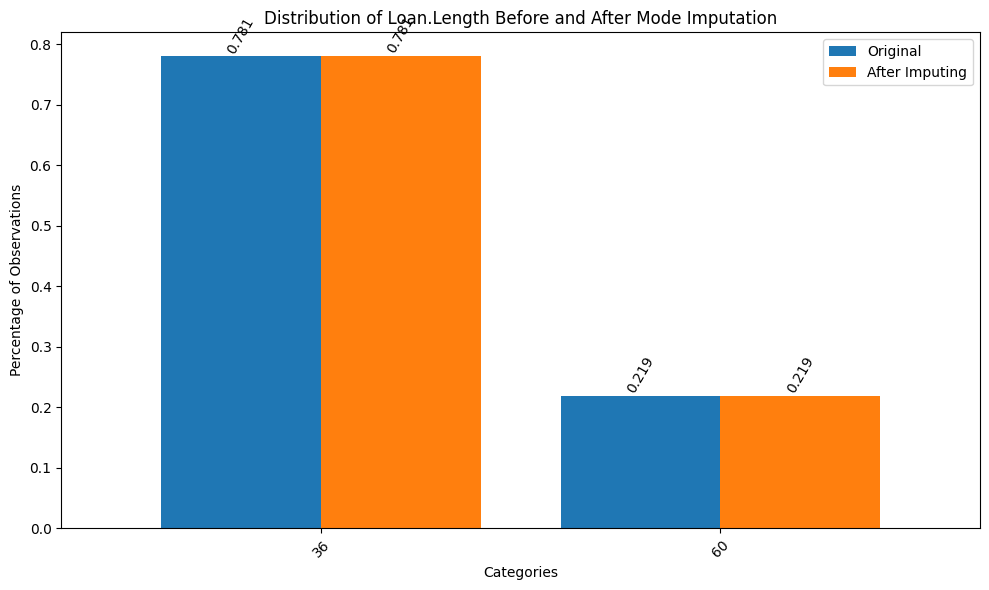

--------------------------------------------------
Column: Loan.Purpose
Missing values: 1


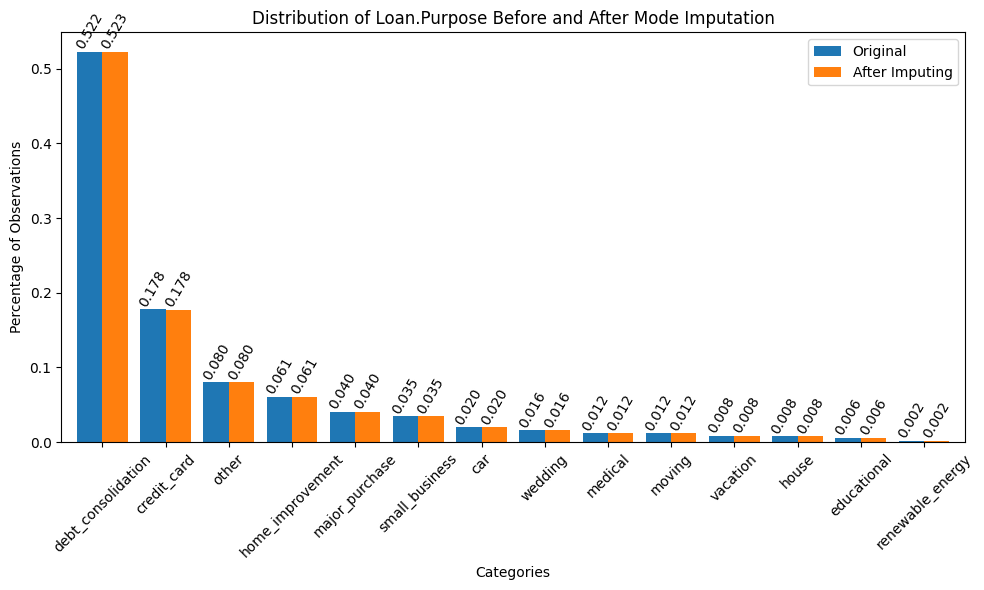

--------------------------------------------------
Column: State
Missing values: 1


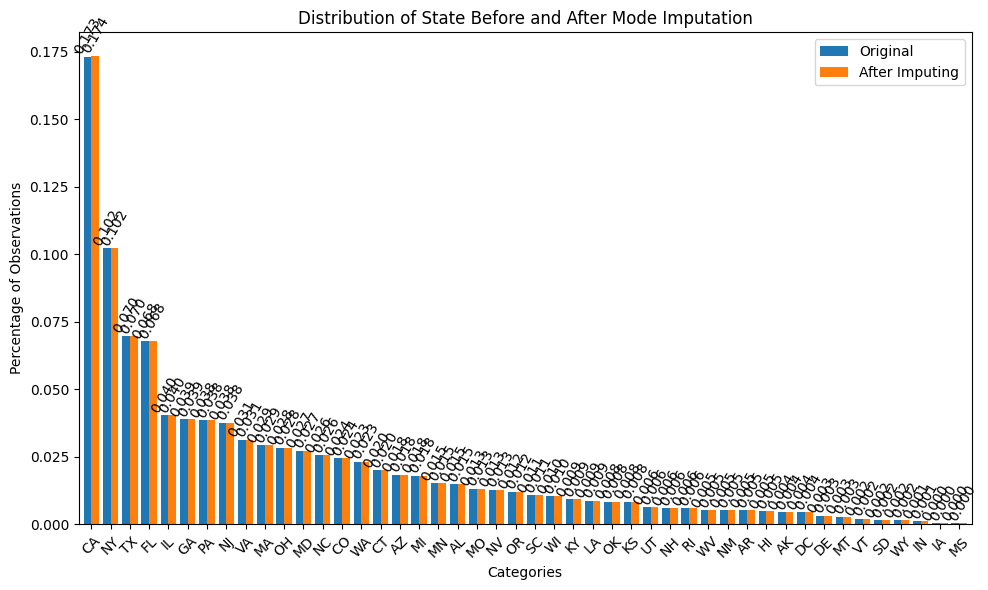

--------------------------------------------------
Column: Home.Ownership
Missing values: 1


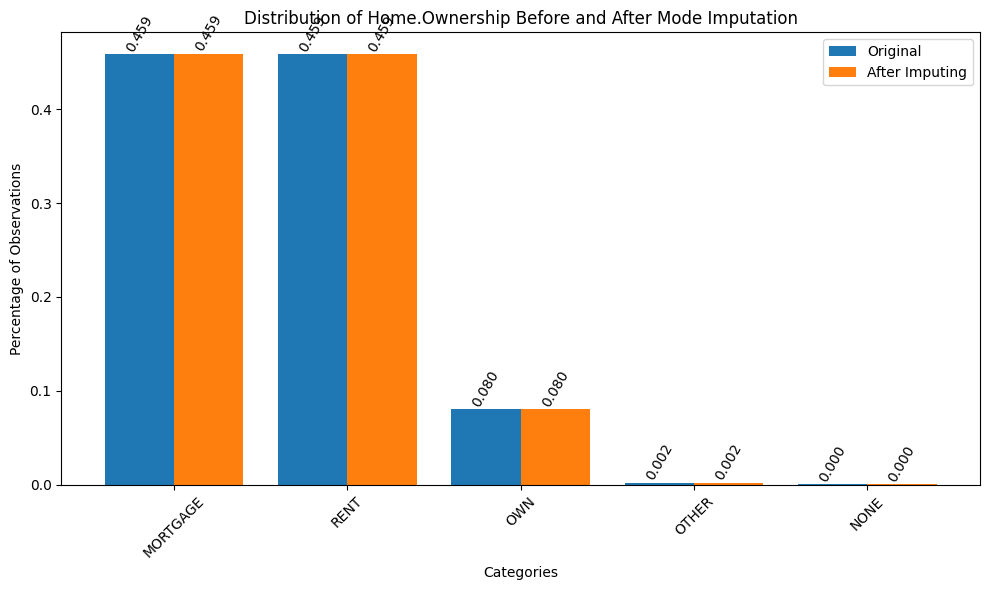

--------------------------------------------------
Column: Employment.Length
Missing values: 77


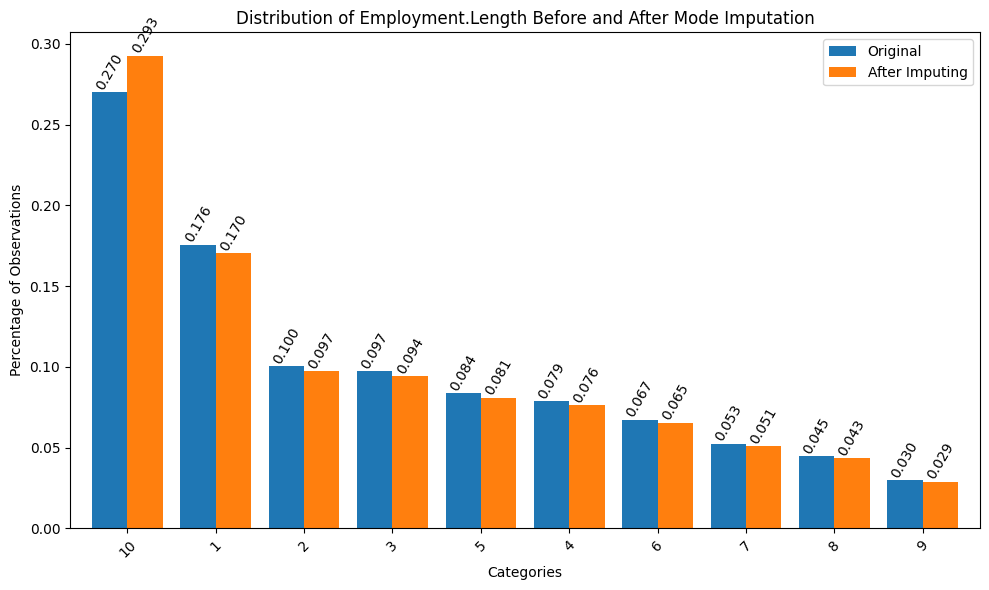

--------------------------------------------------


In [115]:
import matplotlib.pyplot as plt
import pandas as pd

# Rule 2: Check for MCAR (for categorical columns)
for col in cat_cols:
    # Display the number of missing values in the current column
    missing_count = df[col].isna().sum()
    print(f"Column: {col}")
    print(f"Missing values: {missing_count}")
    
    # Calculate the percentage of observations per category for original and imputed data
    temp = pd.concat([
        df[col].value_counts(normalize=True),               # original data (with missing values)
        new_df_mode[col].value_counts(normalize=True)       # data after imputing with mode
    ], axis=1)
    
    # Add column names
    temp.columns = ['Original', 'After Imputing']
    
    # Plot the comparison
    ax = temp.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title(f'Distribution of {col} Before and After Mode Imputation')
    plt.xlabel('Categories')
    plt.ylabel('Percentage of Observations')
    plt.xticks(rotation=45)
    
    # Annotate the bars with the percentage values (rotate text vertically)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.3f}',  # text annotation with 2 decimal places
                    (p.get_x() + p.get_width() / 2., height),  # position
                    ha='center', va='bottom', fontsize=10, color='black', rotation=60)  # vertical rotation
    
    plt.legend(loc='upper right')
    plt.tight_layout()  # Adjust layout to avoid label overlap
    plt.show()
    
    print("-" * 50)


In [116]:
# You can now take a call to remove/impute

cols_to_impute = [var for var in df.columns if (df[var].isnull().mean()*100 < 5) & (df[var].isnull().mean()*100 > 0)]
num_cols = [col for col in cols_to_impute if df[col].dtypes != 'object']
cat_cols = [col for col in cols_to_impute if df[col].dtypes == 'object']

In [117]:
# I am doing Imputation
df = df.fillna(df[num_cols].mean())
df = df.fillna(df[cat_cols].mode().iloc[0,:])
df.shape

(2495, 16)

In [118]:
df.isna().sum()

ID                                0
Loan.Length                       0
Loan.Purpose                      0
State                             0
Home.Ownership                    0
Monthly.Income                    0
Employment.Length                 0
Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Debt.To.Income.Ratio              0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Fico-low                          0
Fico-high                         0
dtype: int64

In [119]:
# Lets save imputed values for deployment

In [120]:
missing_mean_df = pd.DataFrame([df[num_cols].mean()])
missing_mean_df.to_csv('./dependencies/missing_mean.csv',index = False)

missing_mode_df = pd.DataFrame([df[cat_cols].mode().iloc[0, :]])
missing_mode_df.to_csv('./dependencies/missing_mode.csv',index = False)

In [121]:
missing_mean_df

,ID,Monthly.Income,Amount.Requested,Amount.Funded.By.Investors,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
0,51655.359663,5693.147151,12424.216867,12018.426944,15.366981,10.084071,15247.483936,0.906902


In [122]:
missing_mode_df

,Loan.Length,Loan.Purpose,State,Home.Ownership,Employment.Length
0,36,debt_consolidation,CA,MORTGAGE,10


In [123]:
df.isna().sum()

ID                                0
Loan.Length                       0
Loan.Purpose                      0
State                             0
Home.Ownership                    0
Monthly.Income                    0
Employment.Length                 0
Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Debt.To.Income.Ratio              0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Fico-low                          0
Fico-high                         0
dtype: int64

In [124]:
# df.to_csv('./data/loans data 1.csv', index = False)

## Encoding Categorical data

In [125]:
df.shape

(2495, 16)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2495 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2495 non-null   float64
 1   Loan.Length                     2495 non-null   object 
 2   Loan.Purpose                    2495 non-null   object 
 3   State                           2495 non-null   object 
 4   Home.Ownership                  2495 non-null   object 
 5   Monthly.Income                  2495 non-null   float64
 6   Employment.Length               2495 non-null   object 
 7   Amount.Requested                2495 non-null   float64
 8   Amount.Funded.By.Investors      2495 non-null   float64
 9   Interest.Rate                   2495 non-null   float64
 10  Debt.To.Income.Ratio            2495 non-null   float64
 11  Open.CREDIT.Lines               2495 non-null   float64
 12  Revolving.CREDIT.Balance        2495 no

- Model does not accept categorical data when they are avaiable is text format hence its important for us to convert categorical data to numerical before feeding them to the model


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2495 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2495 non-null   float64
 1   Loan.Length                     2495 non-null   object 
 2   Loan.Purpose                    2495 non-null   object 
 3   State                           2495 non-null   object 
 4   Home.Ownership                  2495 non-null   object 
 5   Monthly.Income                  2495 non-null   float64
 6   Employment.Length               2495 non-null   object 
 7   Amount.Requested                2495 non-null   float64
 8   Amount.Funded.By.Investors      2495 non-null   float64
 9   Interest.Rate                   2495 non-null   float64
 10  Debt.To.Income.Ratio            2495 non-null   float64
 11  Open.CREDIT.Lines               2495 non-null   float64
 12  Revolving.CREDIT.Balance        2495 no

In [128]:
cat_cols = ['Loan.Length', 'Loan.Purpose','State','Employment.Length','Home.Ownership']
dummies_df = pd.get_dummies(df[cat_cols],drop_first=True)
dummies_df.shape

(2495, 72)

In [129]:
# dummies_df.columns  # additional spaces can be seen, lets strip of

In [130]:
# dummies_df.columns = [str(col).strip() for col in dummies_df.columns]
# dummies_df.columns

In [131]:
df_all = pd.concat([df.drop(cat_cols,axis = 1), dummies_df],axis = 1)
df_all.shape

(2495, 83)

In [132]:
df_all.info()

# Now its ready for model

<class 'pandas.core.frame.DataFrame'>
Index: 2495 entries, 0 to 2499
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2495 non-null   float64
 1   Monthly.Income                   2495 non-null   float64
 2   Amount.Requested                 2495 non-null   float64
 3   Amount.Funded.By.Investors       2495 non-null   float64
 4   Interest.Rate                    2495 non-null   float64
 5   Debt.To.Income.Ratio             2495 non-null   float64
 6   Open.CREDIT.Lines                2495 non-null   float64
 7   Revolving.CREDIT.Balance         2495 non-null   float64
 8   Inquiries.in.the.Last.6.Months   2495 non-null   float64
 9   Fico-low                         2495 non-null   int64  
 10  Fico-high                        2495 non-null   int64  
 11  Loan.Length_60                   2495 non-null   bool   
 12  Loan.Purpose_credit_card 

In [134]:
df_all.to_csv('./data/loans data preprocessed.csv', index = False)

In [138]:
df_all = pd.read_csv('./data/loans data preprocessed.csv')

In [139]:
X = df_all.drop('Interest.Rate', axis = 1)
y = df_all['Interest.Rate']

In [140]:
X.shape,y.shape

((2495, 82), (2495,))

In [141]:
X.columns

Index(['ID', 'Monthly.Income', 'Amount.Requested',
       'Amount.Funded.By.Investors', 'Debt.To.Income.Ratio',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Fico-low', 'Fico-high',
       'Loan.Length_60', 'Loan.Purpose_credit_card',
       'Loan.Purpose_debt_consolidation', 'Loan.Purpose_educational',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_house',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_MI',
       'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_NH',


**Aditionals**:

- Categorical data can be of 2 types
  1. Nominal
  2. Ordinal

| **Nominal**                     | **Ordinal**                        |
|----------------------------------|------------------------------------|
|There is **no order among the catgories**| There is **order among the categories**|
| Example: **State**, **Department**, **Color** | Example: **Grade**, **Reviews**, **Rank** |
| For nominal data: <br> - Use **One-Hot Encoding** | For ordinal data: <br> - **Input features**: Use **Ordinal Encoding** <br> - **Target variable**: Use **Label Encoding** |

Note: Label Encoder is used with target variable irrespective of whether its nominal or ordinal 

In [142]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((1996, 82), (499, 82))

## Feature Scaling

- Fature Scaling is the last thing done, just before giving the data to the model
- Consider the dataset below
  
![Feature_Scaling.png](image_notes/Feature_Scaling.png)

- Here Age and Salary are in different scales, if we give these features as it is to certain algorithms (like KNN, KMeans, PCA, ANN, Gradient Descent etc) then salary will always dominate Age
- Lets take an example for KNN:

![Need_for_Feature_Scaling.png](image_notes/Need_for_Feature_Scaling.png)

- We can clearly see that squared difference of salary is too high compared to squared difference of Age, hence Salary will always dominate and Age will not have any impact in prediction
- Hence its important in such situations to bring all the features in same scale before giving them to the model, thats where feature scaling can help
- **Its job is to bring all the input features in the same scale**

![Types of Feature Scaling.png](image_notes/Types_of_Feature_Scaling.png)

### Standardization

- Also known as Z-Score Normalization
- Here each data point is transformed using the z-score formula
  
  ![Z-Score.jpg](image_notes/Z-Score.jpg)

![Standardization.png](image_notes/Standardization.png)

- After Standardization, each feature will be scaled such that: mean = 0, SD = 1
- Lets take a look a Geometric Intuition
![Standardization._geometric_intuition.png](image_notes/Standardization._geometric_intuition.png)

- Entire data is centered around mean ence this is also known as mean centering
- Note:
    - Scaling does not impact the shape of distribution, it just changes the scale
    - Scaling has no impact on outlier

### Normalisation

- Standardization centers the data (mean = 0) and makes it have equal variance (standard deviation = 1). This is helpful when algorithms need data that are on the same scale but don’t necessarily need a fixed range (e.g., some models are sensitive to the mean and variance).
- Normalization squeezes the data into a fixed range (e.g., 0 to 1), so every feature has the same scale.
- Techniques used for Normalization
  1. MinMaxScaling
  2. Mean normalization
  3. Max absolute
  4. Robust scaling

In [78]:
X_train.describe()

,ID,Monthly.Income,Amount.Requested,Amount.Funded.By.Investors,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.00000,1996.000000,1996.000000
mean,51327.010200,5729.905009,12530.321185,12112.131165,15.431682,10.083503,15178.247463,0.89465,705.971944,709.971944
std,30147.026833,4142.154239,7897.468302,7819.879819,7.489169,4.526731,18010.363354,1.23643,34.768222,34.768222
min,10.000000,588.500000,1000.000000,-0.010000,0.000000,2.000000,0.000000,0.00000,640.000000,644.000000
25%,25836.750000,3500.000000,6000.000000,6000.000000,9.770000,7.000000,5583.500000,0.00000,680.000000,684.000000
50%,50768.500000,5000.000000,10050.000000,10000.000000,15.425000,9.000000,11072.000000,0.00000,700.000000,704.000000
75%,77242.750000,6841.977500,17000.000000,16212.500000,20.700000,13.000000,18870.250000,1.00000,725.000000,729.000000
max,104202.000000,102750.000000,35000.000000,35000.000000,34.910000,38.000000,270800.000000,9.00000,830.000000,834.000000


In [8]:
from sklearn.neighbors import KNeighborsRegressor

knn1 = KNeighborsRegressor()
knn1

KNeighborsRegressor()

In [16]:
X_train.shape,y_train.shape

((1996, 82), (1996,))

In [9]:
knn1.fit(X_train,y_train)

KNeighborsRegressor()

In [10]:
y_pred_train = knn1.predict(X_train)
y_pred_train.shape

(1996,)

In [11]:
y_pred_train

array([11.7  , 10.7  , 19.668, ..., 11.516, 13.964, 14.54 ])

In [12]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

print(f'mean_absolute_error : {mean_absolute_error(y_train, y_pred_train)}')
print(f'r2_score : {r2_score(y_train, y_pred_train)}')
print(f'mean_squared_error : {mean_squared_error(y_train, y_pred_train)}')
print(f'root_mean_squared_error : {root_mean_squared_error(y_train, y_pred_train)}')

mean_absolute_error : 2.675711422845691
r2_score : 0.36730059129167536
mean_squared_error : 11.164111727454909
root_mean_squared_error : 3.341273967733701


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn1, X_train,y_train,scoring = 'r2', cv = 7)

array([ 0.09837079,  0.09662206, -0.17032457,  0.12895101,  0.01083656,
        0.0775721 , -0.11471525])

In [129]:
y_pred = knn1.predict(X_test)
y_pred.shape

(499,)

In [130]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

print(f'mean_absolute_error : {mean_absolute_error(y_test, y_pred)}')
print(f'r2_score : {r2_score(y_test, y_pred)}')
print(f'mean_squared_error : {mean_squared_error(y_test, y_pred)}')
print(f'root_mean_squared_error : {root_mean_squared_error(y_test, y_pred)}')

mean_absolute_error : 3.3805290581162324
r2_score : -0.032809667428575384
mean_squared_error : 17.301670428857715
root_mean_squared_error : 4.159527668961672


Lets see impact of scaling

In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [138]:
sc.mean_.shape

(82,)

In [139]:
sc.mean_

array([5.13270102e+04, 5.72990501e+03, 1.25303212e+04, 1.21121312e+04,
       1.54316819e+01, 1.00835033e+01, 1.51782475e+04, 8.94649652e-01,
       7.05971944e+02, 7.09971944e+02, 2.29959920e-01, 1.74348697e-01,
       5.24048096e-01, 6.01202405e-03, 6.21242485e-02, 9.51903808e-03,
       3.90781563e-02, 1.05210421e-02, 1.15230461e-02, 8.01603206e-02,
       2.00400802e-03, 3.55711423e-02, 8.01603206e-03, 1.60320641e-02,
       1.55310621e-02, 5.51102204e-03, 2.00400802e-02, 1.74348697e-01,
       2.10420842e-02, 2.15430862e-02, 5.01002004e-03, 2.50501002e-03,
       6.91382766e-02, 4.10821643e-02, 4.50901804e-03, 5.01002004e-04,
       3.35671343e-02, 1.00200401e-03, 9.01803607e-03, 9.01803607e-03,
       8.51703407e-03, 2.85571142e-02, 2.85571142e-02, 1.70340681e-02,
       1.55310621e-02, 1.20240481e-02, 5.01002004e-04, 3.00601202e-03,
       2.60521042e-02, 6.01202405e-03, 4.00801603e-02, 5.01002004e-03,
       1.50300601e-02, 1.00200401e-01, 2.80561122e-02, 8.51703407e-03,
      

In [140]:
X_test_scaled = sc.transform(X_test)

In [141]:
X_train.describe()

,ID,Monthly.Income,Amount.Requested,Amount.Funded.By.Investors,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.00000,1996.000000,1996.000000
mean,51327.010200,5729.905009,12530.321185,12112.131165,15.431682,10.083503,15178.247463,0.89465,705.971944,709.971944
std,30147.026833,4142.154239,7897.468302,7819.879819,7.489169,4.526731,18010.363354,1.23643,34.768222,34.768222
min,10.000000,588.500000,1000.000000,-0.010000,0.000000,2.000000,0.000000,0.00000,640.000000,644.000000
25%,25836.750000,3500.000000,6000.000000,6000.000000,9.770000,7.000000,5583.500000,0.00000,680.000000,684.000000
50%,50768.500000,5000.000000,10050.000000,10000.000000,15.425000,9.000000,11072.000000,0.00000,700.000000,704.000000
75%,77242.750000,6841.977500,17000.000000,16212.500000,20.700000,13.000000,18870.250000,1.00000,725.000000,729.000000
max,104202.000000,102750.000000,35000.000000,35000.000000,34.910000,38.000000,270800.000000,9.00000,830.000000,834.000000


In [142]:
pd.DataFrame(X_train_scaled, columns = X_train.columns).describe()

,ID,Monthly.Income,Amount.Requested,Amount.Funded.By.Investors,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high,...,Employment.Length_4,Employment.Length_5,Employment.Length_6,Employment.Length_7,Employment.Length_8,Employment.Length_9,Home.Ownership_NONE,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT
count,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,...,1.996000e+03,1.996000e+03,1996.000000,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03,1.996000e+03
mean,1.174745e-16,4.805775e-17,-2.135900e-16,2.669875e-17,-1.477331e-16,7.475650e-17,-2.491883e-17,-2.135900e-17,7.885031e-16,7.885031e-16,...,3.648829e-17,1.334938e-17,0.000000,-1.779917e-18,7.119667e-17,-2.313892e-17,7.119667e-18,-4.093808e-17,-7.119667e-18,1.326038e-16
std,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,...,1.000251e+00,1.000251e+00,1.000251,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00
min,-1.702651e+00,-1.241550e+00,-1.460368e+00,-1.549279e+00,-2.061050e+00,-1.786174e+00,-8.429620e-01,-7.237564e-01,-1.897954e+00,-1.897954e+00,...,-2.921857e-01,-2.891449e-01,-0.260674,-2.320652e-01,-2.069836e-01,-1.683327e-01,-2.238868e-02,-4.481107e-02,-3.031563e-01,-9.107767e-01
25%,-8.457434e-01,-5.384792e-01,-8.270951e-01,-7.818103e-01,-7.561721e-01,-6.813472e-01,-5.328683e-01,-7.237564e-01,-7.471895e-01,-7.471895e-01,...,-2.921857e-01,-2.891449e-01,-0.260674,-2.320652e-01,-2.069836e-01,-1.683327e-01,-2.238868e-02,-4.481107e-02,-3.031563e-01,-9.107767e-01
50%,-1.853085e-02,-1.762580e-01,-3.141441e-01,-2.701653e-01,-8.924259e-04,-2.394166e-01,-2.280507e-01,-7.237564e-01,-1.718075e-01,-1.718075e-01,...,-2.921857e-01,-2.891449e-01,-0.260674,-2.320652e-01,-2.069836e-01,-1.683327e-01,-2.238868e-02,-4.481107e-02,-3.031563e-01,-9.107767e-01
75%,8.598604e-01,2.685441e-01,5.661053e-01,5.244833e-01,7.036346e-01,6.444446e-01,2.050446e-01,8.522664e-02,5.474201e-01,5.474201e-01,...,-2.921857e-01,-2.891449e-01,-0.260674,-2.320652e-01,-2.069836e-01,-1.683327e-01,-2.238868e-02,-4.481107e-02,-3.031563e-01,1.097964e+00
max,1.754343e+00,2.342849e+01,2.845888e+00,2.927616e+00,2.601517e+00,6.168577e+00,1.419659e+01,6.557091e+00,3.568176e+00,3.568176e+00,...,3.422481e+00,3.458474e+00,3.836214,4.309133e+00,4.831300e+00,5.940615e+00,4.466542e+01,2.231591e+01,3.298629e+00,1.097964e+00


In [143]:
from sklearn.neighbors import KNeighborsRegressor

knn2 = KNeighborsRegressor()
knn2

KNeighborsRegressor()

In [144]:
knn2.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [145]:
y_pred = knn2.predict(X_test_scaled)
y_pred.shape

(499,)

In [146]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

print(f'mean_absolute_error : {mean_absolute_error(y_test, y_pred)}')
print(f'r2_score : {r2_score(y_test, y_pred)}')
print(f'mean_squared_error : {mean_squared_error(y_test, y_pred)}')
print(f'root_mean_squared_error : {root_mean_squared_error(y_test, y_pred)}')

mean_absolute_error : 2.7863647294589176
r2_score : 0.2826539456145051
mean_squared_error : 12.017010885771542
root_mean_squared_error : 3.466556055478051


In [162]:
# cross validation

In [147]:
# Test the model1 on training data

y_pred_train_1 = knn1.predict(X_train)

print(f'mean_absolute_error : {mean_absolute_error(y_train, y_pred_train_1)}')
print(f'r2_score : {r2_score(y_train, y_pred_train_1)}')
print(f'mean_squared_error : {mean_squared_error(y_train, y_pred_train_1)}')
print(f'root_mean_squared_error : {root_mean_squared_error(y_train, y_pred_train_1)}')

mean_absolute_error : 2.675711422845691
r2_score : 0.36730059129167536
mean_squared_error : 11.164111727454909
root_mean_squared_error : 3.341273967733701


In [148]:
# Test the model1 on test data

y_pred_test_1 = knn1.predict(X_test)

print(f'mean_absolute_error : {mean_absolute_error(y_test, y_pred_test_1)}')
print(f'r2_score : {r2_score(y_test, y_pred_test_1)}')
print(f'mean_squared_error : {mean_squared_error(y_test, y_pred_test_1)}')
print(f'root_mean_squared_error : {root_mean_squared_error(y_test, y_pred_test_1)}')

mean_absolute_error : 3.3805290581162324
r2_score : -0.032809667428575384
mean_squared_error : 17.301670428857715
root_mean_squared_error : 4.159527668961672


In [149]:
# Cross val score gives a better picture on training data too

from sklearn.model_selection import cross_val_score
cross_val_score(knn1, X_train, y_train, cv = 5, scoring = 'r2').mean()

0.04897165778403569

In [150]:
# Test the model2 on training data

y_pred_train_2 = knn2.predict(X_train_scaled)

print(f'mean_absolute_error : {mean_absolute_error(y_train, y_pred_train_2)}')
print(f'r2_score : {r2_score(y_train, y_pred_train_2)}')
print(f'mean_squared_error : {mean_squared_error(y_train, y_pred_train_2)}')
print(f'root_mean_squared_error : {root_mean_squared_error(y_train, y_pred_train_2)}')

mean_absolute_error : 2.244007014028056
r2_score : 0.5534770207161568
mean_squared_error : 7.878990182364729
root_mean_squared_error : 2.806953897441981


In [151]:
# Test the model2 on test data

y_pred_test_2 = knn2.predict(X_test_scaled)

print(f'mean_absolute_error : {mean_absolute_error(y_test, y_pred_test_2)}')
print(f'r2_score : {r2_score(y_test, y_pred_test_2)}')
print(f'mean_squared_error : {mean_squared_error(y_test, y_pred_test_2)}')
print(f'root_mean_squared_error : {root_mean_squared_error(y_test, y_pred_test_2)}')

mean_absolute_error : 2.7863647294589176
r2_score : 0.2826539456145051
mean_squared_error : 12.017010885771542
root_mean_squared_error : 3.466556055478051


In [152]:
# Cross val score gives a better picture on training data too

cross_val_score(knn2, X_train_scaled, y_train, cv = 5, scoring = 'r2').mean()

0.31354274355382833

In [143]:
# lets enclose training steps in a function

def train(X_train, X_test, y_train, y_test, models, sort_by_metric = 'R2_Score', ascending = False):
    res = pd.DataFrame()
    cv_res = pd.DataFrame()
    
    model_names = []
    for model in models:
        
        model_name = model.__class__.__name__
        model_names.append(model_name)
        
        # train the model
        model.fit(X_train, y_train)

        # pred on training data
        y_train_pred = model.predict(X_train)
        r2_train = r2_score(y_train, y_train_pred)
        
        # cv on training
        cv_score = cross_val_score(model,X_train,y_train, cv=5,scoring = 'r2').mean()
        
        # make prediction on test data
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)

        res = pd.concat([res, pd.DataFrame([[mae,r2,mse,rmse]])], axis = 0)
        cv_res = pd.concat([cv_res, pd.DataFrame([[r2_train,cv_score]])], axis = 0)
    res.columns = ['MAE','R2_Score','MSE','RMSE']
    cv_res.columns = ['R2_Score_wo_cv','R2_Score_with_cv5']
    res.index = model_names
    cv_res.index = model_names

    res = res.sort_values(by = sort_by_metric, ascending=ascending)
    cv_res = cv_res.sort_values(by = 'R2_Score_with_cv5', ascending=ascending)
    return (cv_res, res)

In [144]:
cv_res, res = train(X_train,X_test,y_train,y_test,[knn1])

In [145]:
cv_res

,R2_Score_wo_cv,R2_Score_with_cv5
KNeighborsRegressor,0.367301,0.048972


In [146]:
res

,MAE,R2_Score,MSE,RMSE
KNeighborsRegressor,3.380529,-0.03281,17.30167,4.159528


In [147]:
cv_res, res = train(X_train_scaled,X_test_scaled,y_train,y_test,[knn2])

NameError: name 'X_train_scaled' is not defined

In [163]:
cv_res

,R2_Score_wo_cv,R2_Score_with_cv5
KNeighborsRegressor,0.553477,0.313543


In [164]:
res

,MAE,R2_Score,MSE,RMSE
KNeighborsRegressor,2.786365,0.282654,12.017011,3.466556


In [155]:
X_train.columns

Index(['ID', 'Monthly.Income', 'Amount.Requested',
       'Amount.Funded.By.Investors', 'Debt.To.Income.Ratio',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Fico-low', 'Fico-high',
       'Loan.Length_60', 'Loan.Purpose_credit_card',
       'Loan.Purpose_debt_consolidation', 'Loan.Purpose_educational',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_house',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_MI',
       'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_NH',


### Multiple models

In [177]:
# !pip install xgboost

In [178]:
# !pip install catboost

In [150]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

knn = KNeighborsRegressor()
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
en = ElasticNet()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
cb = CatBoostRegressor(verbose=0)

models = [knn,lr,lasso,ridge,en,dt,rf,xgb,cb]

In [151]:
cv_res, res =train(X_train,X_test,y_train,y_test,models)

In [152]:
cv_res

,R2_Score_wo_cv,R2_Score_with_cv5
CatBoostRegressor,0.979260,0.894916
XGBRegressor,0.996616,0.866373
RandomForestRegressor,0.979557,0.847424
Ridge,0.778513,0.756745
LinearRegression,0.779422,0.755355
DecisionTreeRegressor,1.000000,0.713104
ElasticNet,0.669362,0.663400
Lasso,0.663818,0.659614
KNeighborsRegressor,0.367301,0.048972


In [153]:
res

,MAE,R2_Score,MSE,RMSE
CatBoostRegressor,0.960720,0.888742,1.863798,1.365210
XGBRegressor,1.082092,0.841707,2.651729,1.628413
RandomForestRegressor,1.150375,0.813472,3.124727,1.767690
Ridge,1.562695,0.729159,4.537135,2.130055
LinearRegression,1.567234,0.727697,4.561630,2.135797
DecisionTreeRegressor,1.478617,0.705730,4.929631,2.220277
ElasticNet,1.860776,0.660929,5.680129,2.383302
Lasso,1.874286,0.656582,5.752961,2.398533
KNeighborsRegressor,3.380529,-0.032810,17.301670,4.159528


In [154]:
import pickle
with open('./dependencies/final_model.pkl', 'wb') as file:
    pickle.dump(cb, file)